In [2]:
import pandas as pd
import json
with open('json_files/teams_and_players_2023-12-15.json','r') as f:
    master_json = json.load(f)
pd.DataFrame(master_json["PURDUE"].keys())

,0
0,player_info
1,player_per_game_simple
2,player_per_game_simple_conf
3,player_totals
4,player_totals_conf
5,player_per_100_possessions
6,player_per_100_possessions_conf
7,player_advanced
8,player_advanced_conf


In [3]:
def create_all_player_totals_dataframe() -> pd.DataFrame:
    
    list_to_transform = []
    
    for team,data in master_json.items():
        
        for player_data_row in data['player_totals']:
            list_to_transform.append(player_data_row)
    
    return pd.DataFrame(list_to_transform,index = [i for i in range(len(list_to_transform))])\
        .query("Player != 'School Totals'").drop('Rk',axis = 1)

def create_all_player_per_100_dataframe() -> pd.DataFrame:
    
    list_to_transform = []
    
    for team,data in master_json.items():
        
        for player_data_row in data['player_per_100_possessions']:
            list_to_transform.append(player_data_row)
    
    return pd.DataFrame(list_to_transform,index = [i for i in range(len(list_to_transform))])\
        .query("Player != 'School Totals'").drop('Rk',axis = 1)

ap_df = create_all_player_per_100_dataframe()
ap_df

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,team
0,Colby Tanner,4,0,12,13.7,22.8,0.600,0.0,0.0,NaN,...,4.6,0.0,4.6,0.0,4.6,4.6,45.6,132.3,98.1,ABILENE CHRISTIAN
1,Airion Simmons,10,8,233,12.7,25.9,0.491,10.1,18.6,0.544,...,12.9,4.5,3.5,0.7,4.5,6.8,32.7,104.4,95.4,ABILENE CHRISTIAN
2,Muodubem Muoneke,9,0,46,11.9,21.4,0.556,11.9,20.2,0.588,...,13.1,2.4,0.0,0.0,3.6,8.3,31.0,108.2,105.9,ABILENE CHRISTIAN
3,Ali Abdou Dibba,10,10,260,9.9,23.2,0.427,8.8,20.0,0.442,...,8.0,2.7,2.7,0.2,4.6,4.8,28.0,96.5,100.4,ABILENE CHRISTIAN
4,Leonardo Bettiol,7,1,75,9.5,13.1,0.722,9.5,13.1,0.722,...,11.7,4.4,0.7,0.7,4.4,12.4,26.3,127.4,103.1,ABILENE CHRISTIAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,Gabe Dynes,11,0,136,9.5,12.8,0.742,9.5,12.3,0.767,...,16.1,2.1,1.2,8.2,1.6,4.5,19.8,135.4,89.8,YOUNGSTOWN STATE
4832,Bryson Langdon,11,11,317,6.9,17.3,0.398,5.3,11.3,0.469,...,3.5,7.2,1.6,0.0,4.1,3.5,17.8,100.1,105.9,YOUNGSTOWN STATE
4833,Imanuel Zorgvol,9,0,69,5.7,9.7,0.583,5.7,9.7,0.583,...,19.5,0.8,1.6,4.1,4.1,13.8,17.8,108.4,91.6,YOUNGSTOWN STATE
4834,Jaylen Bates,9,0,108,5.2,15.0,0.345,2.6,7.8,0.333,...,19.2,2.1,0.5,2.1,3.6,6.2,17.1,104.6,98.2,YOUNGSTOWN STATE


In [4]:
import numpy as np

def calculate_3_point_proficiency(three_pa:int,
                                  three_pct:float) -> float:
    
    if three_pa == 0:
        return 0
    
    return (2/(1 + np.exp(-three_pa))-1) * three_pct

ap_df['3pt_prof'] = ap_df.apply(lambda x: calculate_3_point_proficiency(x['3PA'],x['3P%']),axis = 1)

<AxesSubplot:xlabel='3pt_prof', ylabel='3P%'>

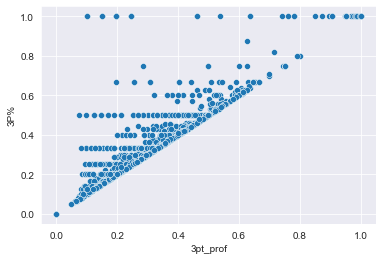

In [5]:
import seaborn as sns

sns.scatterplot(x = ap_df['3pt_prof'],y = ap_df['3P%'])

<AxesSubplot:xlabel='3pt_prof', ylabel='Count'>

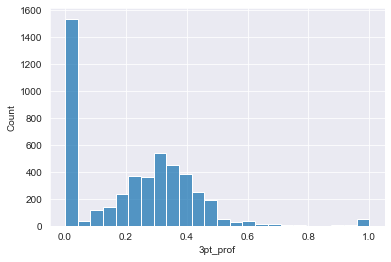

In [6]:
sns.histplot(ap_df['3pt_prof'])

In [7]:
ap_df.query("team == 'PURDUE'")[['Player','3PA','3P%','3pt_prof']]

,Player,3PA,3P%,3pt_prof
3251,Sam King,0.0,NaN,0.000000
3252,Will Berg,0.0,NaN,0.000000
3253,Zach Edey,0.0,NaN,0.000000
3254,Myles Colvin,13.1,0.462,0.461998
3255,Braden Smith,5.8,0.455,0.452253
3256,Trey Kaufman-Renn,3.2,0.444,0.409221
3257,Lance Jones,10.9,0.353,0.352987
3258,Fletcher Loyer,9.1,0.357,0.356920
3259,Mason Gillis,5.9,0.526,0.523126
3260,Chase Martin,8.0,0.000,0.000000


In [17]:
all_df = create_all_player_totals_dataframe()
all_df['team_mp'] = all_df.groupby('team').MP.transform("sum")
all_df['team_to'] = all_df.groupby('team').TOV.transform("sum")
all_df['team_fga'] = all_df.groupby('team').FGA.transform("sum")
all_df['team_fta'] = all_df.groupby('team').FTA.transform("sum")
all_df.query('team == "PURDUE"')

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,STL,BLK,TOV,PF,PTS,team,team_mp,team_to,team_fga,team_fta
3493,Zach Edey,10,10.0,292,80,127,0.630,80,127,0.630,...,1,26,17,18,248,PURDUE,2026,118,589,271
3494,Braden Smith,10,10.0,319,50,104,0.481,35,71,0.493,...,16,1,25,17,132,PURDUE,2026,118,589,271
3495,Lance Jones,10,10.0,262,37,87,0.425,19,36,0.528,...,17,1,17,19,106,PURDUE,2026,118,589,271
3496,Fletcher Loyer,10,10.0,259,30,79,0.380,15,37,0.405,...,8,0,14,15,102,PURDUE,2026,118,589,271
3497,Trey Kaufman-Renn,10,10.0,159,22,45,0.489,18,36,0.500,...,2,3,7,12,65,PURDUE,2026,118,589,271
3498,Mason Gillis,10,0.0,180,16,31,0.516,6,12,0.500,...,0,0,11,12,53,PURDUE,2026,118,589,271
3499,Myles Colvin,10,0.0,111,17,37,0.459,5,11,0.455,...,3,2,5,10,49,PURDUE,2026,118,589,271
3500,Camden Heide,10,0.0,124,13,23,0.565,8,14,0.571,...,0,6,7,20,34,PURDUE,2026,118,589,271
3501,Caleb Furst,10,0.0,144,10,26,0.385,8,19,0.421,...,3,4,8,12,31,PURDUE,2026,118,589,271
3502,Will Berg,4,0.0,20,8,11,0.727,8,11,0.727,...,0,0,2,4,18,PURDUE,2026,118,589,271


In [40]:
def calculate_usage(fga: int, 
                    fta:int,
                    to: int,
                    player_min: int,
                    team_min: int,
                    team_fga: int,
                    team_fta: int,
                    team_to: int) -> float:
    
    numerator = 100 * ((fga + (0.475 * fta) + to) * (team_min/5))
    denominator = player_min * (team_fga + (0.475 * team_fta) + team_to)
    if denominator == 0:
        return 0
    
    return numerator/denominator

all_df.query('team == "PURDUE"')

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,BLK,TOV,PF,PTS,team,team_mp,team_to,team_fga,team_fta,usg
3493,Zach Edey,10,10.0,292,80,127,0.630,80,127,0.630,...,26,17,18,248,PURDUE,2026,118,589,271,33.059361
3494,Braden Smith,10,10.0,319,50,104,0.481,35,71,0.493,...,1,25,17,132,PURDUE,2026,118,589,271,21.267218
3495,Lance Jones,10,10.0,262,37,87,0.425,19,36,0.528,...,1,17,19,106,PURDUE,2026,118,589,271,21.003932
3496,Fletcher Loyer,10,10.0,259,30,79,0.380,15,37,0.405,...,0,14,15,102,PURDUE,2026,118,589,271,20.077220
3497,Trey Kaufman-Renn,10,10.0,159,22,45,0.489,18,36,0.500,...,3,7,12,65,PURDUE,2026,118,589,271,20.781399
3498,Mason Gillis,10,0.0,180,16,31,0.516,6,12,0.500,...,0,11,12,53,PURDUE,2026,118,589,271,12.976431
3499,Myles Colvin,10,0.0,111,17,37,0.459,5,11,0.455,...,2,5,10,49,PURDUE,2026,118,589,271,19.175539
3500,Camden Heide,10,0.0,124,13,23,0.565,8,14,0.571,...,6,7,20,34,PURDUE,2026,118,589,271,12.473118
3501,Caleb Furst,10,0.0,144,10,26,0.385,8,19,0.421,...,4,8,12,31,PURDUE,2026,118,589,271,13.846801
3502,Will Berg,4,0.0,20,8,11,0.727,8,11,0.727,...,0,2,4,18,PURDUE,2026,118,589,271,34.969697


In [38]:
all_df['usg'] = all_df.apply(lambda x: calculate_usage(x.FGA,x.FTA,x.TOV,x.MP,x.team_mp,x.team_fga,x.team_fta,x.team_to),axis = 1)
ap_df.merge(all_df[['Player','team','usg']], on = ['Player','team']).query('team == "PURDUE"')

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,STL,BLK,TOV,PF,PTS,ORtg,DRtg,team,3pt_prof,usg
3251,Sam King,2,0,2,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,56.0,28.0,0.0,56.0,88.7,3.4,PURDUE,0.000000,70.303030
3252,Will Berg,4,0,20,22.4,30.8,0.727,22.4,30.8,0.727,...,0.0,0.0,5.6,11.2,50.4,129.8,99.7,PURDUE,0.000000,34.969697
3253,Zach Edey,10,10,292,15.3,24.4,0.630,15.3,24.4,0.630,...,0.2,5.0,3.3,3.5,47.6,142.0,93.6,PURDUE,0.000000,33.059361
3254,Myles Colvin,10,0,111,8.6,18.7,0.459,2.5,5.5,0.455,...,1.5,1.0,2.5,5.0,24.7,117.7,102.4,PURDUE,0.461998,19.175539
3255,Braden Smith,10,10,319,8.8,18.3,0.481,6.1,12.5,0.493,...,2.8,0.2,4.4,3.0,23.2,121.2,95.3,PURDUE,0.452253,21.267218
3256,Trey Kaufman-Renn,10,10,159,7.7,15.8,0.489,6.3,12.7,0.500,...,0.7,1.1,2.5,4.2,22.9,115.9,99.4,PURDUE,0.409221,20.781399
3257,Lance Jones,10,10,262,7.9,18.6,0.425,4.1,7.7,0.528,...,3.6,0.2,3.6,4.1,22.7,108.4,96.7,PURDUE,0.352987,21.003932
3258,Fletcher Loyer,10,10,259,6.5,17.1,0.380,3.2,8.0,0.405,...,1.7,0.0,3.0,3.2,22.1,111.7,101.3,PURDUE,0.356920,20.077220
3259,Mason Gillis,10,0,180,5.0,9.6,0.516,1.9,3.7,0.500,...,0.0,0.0,3.4,3.7,16.5,127.3,103.6,PURDUE,0.523126,12.976431
3260,Chase Martin,3,0,7,8.0,24.0,0.333,8.0,16.0,0.500,...,0.0,0.0,16.0,8.0,16.0,63.1,96.3,PURDUE,0.000000,34.632035


In [39]:
all_df.query('team == "PURDUE"')

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,BLK,TOV,PF,PTS,team,team_mp,team_to,team_fga,team_fta,usg
3493,Zach Edey,10,10.0,292,80,127,0.630,80,127,0.630,...,26,17,18,248,PURDUE,2026,118,589,271,33.059361
3494,Braden Smith,10,10.0,319,50,104,0.481,35,71,0.493,...,1,25,17,132,PURDUE,2026,118,589,271,21.267218
3495,Lance Jones,10,10.0,262,37,87,0.425,19,36,0.528,...,1,17,19,106,PURDUE,2026,118,589,271,21.003932
3496,Fletcher Loyer,10,10.0,259,30,79,0.380,15,37,0.405,...,0,14,15,102,PURDUE,2026,118,589,271,20.077220
3497,Trey Kaufman-Renn,10,10.0,159,22,45,0.489,18,36,0.500,...,3,7,12,65,PURDUE,2026,118,589,271,20.781399
3498,Mason Gillis,10,0.0,180,16,31,0.516,6,12,0.500,...,0,11,12,53,PURDUE,2026,118,589,271,12.976431
3499,Myles Colvin,10,0.0,111,17,37,0.459,5,11,0.455,...,2,5,10,49,PURDUE,2026,118,589,271,19.175539
3500,Camden Heide,10,0.0,124,13,23,0.565,8,14,0.571,...,6,7,20,34,PURDUE,2026,118,589,271,12.473118
3501,Caleb Furst,10,0.0,144,10,26,0.385,8,19,0.421,...,4,8,12,31,PURDUE,2026,118,589,271,13.846801
3502,Will Berg,4,0.0,20,8,11,0.727,8,11,0.727,...,0,2,4,18,PURDUE,2026,118,589,271,34.969697
